In [1]:
import matplotlib.pyplot as plt
import numpy as np
from processing import helpers as h

In [2]:
data_path = "jmas_data/redshift_distributions/convolution_method/"
redshift_range = np.load(f"{data_path}redshift_range.npy")
redshift_distribution = np.load(f"{data_path}redshift_distribution.npy")
luminosity_at_redshift = np.load(f"{data_path}luminosity_at_redshift.npy")
comoving_volume = np.load(f"{data_path}comoving_volume.npy")

dpi = h.dpi

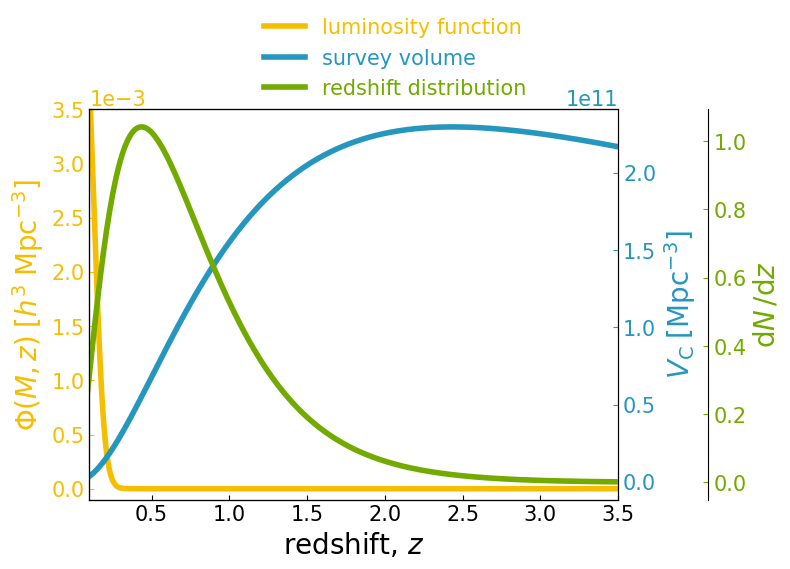

In [3]:
# Set global plot parameters
plt.rcParams["lines.linewidth"] = 4
plt.rc("xtick", labelsize=15) 
plt.rc("ytick", labelsize=15)

# Create a figure and a set of subplots (in this case, only one)
fig, ax1 = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')

# Create two additional axes that share the x-axis with ax1
ax2 = ax1.twinx()
ax3 = ax1.twinx()

cyberyellow = "#F6BE00"
teal = "#2596be"
green = "#72aa00"

# Create and format the first line (luminosity function)
line1, = ax1.plot(redshift_range, luminosity_at_redshift, c=cyberyellow, label="luminosity function")
ax1.set_xlabel("redshift, $z$", fontsize=20)
ax1.set_ylabel("$\Phi (M, z) \; [h^3 \; \\rm{Mpc^{-3}}]$", color=cyberyellow, fontsize=20)
ax1.tick_params("y", colors=cyberyellow)
ax1.set_xlim(0.1, 3.5)
ax1.set_ylim(-0.0001, 0.0035)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Create and format the second line (comoving volume)
line2, = ax2.plot(redshift_range, comoving_volume, c=teal, label="comoving volume")
ax2.set_ylabel("$V_{\mathrm{C}} \; [\mathrm{Mpc^{-3}}]$",  color=teal, fontsize=20)
ax2.tick_params("y",  colors=teal)

# Create and format the third line (redshift distribution)
# The axis is shifted to the right for clear visibility
ax3.spines['right'].set_position(('outward', 65))
line3, = ax3.plot(redshift_range, redshift_distribution, c=green, label="redshift distribution")
dndz_label = "$\\mathrm{d}N \\// \\mathrm{d}z$"
ax3.set_ylabel(dndz_label, color=green, fontsize=20)
ax3.tick_params("y", colors=green,direction="in")

# Define axes, colors, and labels for later use
axs = [ax1, ax2, ax3]
colors = [cyberyellow, teal, green]
labels = ["luminosity function", "survey volume", "redshift distribution"]

# Set common parameters for all axes
for ax in axs:
    ax.tick_params(direction='in', axis='both', which='both', labelsize=15)

# Create the legend with color-matched text
lines = [line1, line2, line3]
legend = fig.legend(lines, labels, frameon=False, fontsize=15, loc='upper center', bbox_to_anchor=(0.5, 1.15))
for line, text in zip(legend.get_lines(), legend.get_texts()):
    text.set_color(line.get_color())  # Color match the legend text to the line color

# Automatically adjust the subplot parameters to give specified padding
plt.tight_layout()


path = "plots_output/redshift_distributions/"
plt.savefig(path + f"convolution_method.pdf", bbox_inches="tight", dpi=dpi["pdf"])
plt.savefig(path + f"convolution_method.png", bbox_inches="tight", dpi=dpi["png"], transparent=False)
